In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_excel('Data\c.xlsx')
df

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
Sred_znac = round(df['NA_Sales'].mean(), 2)
print("Ответ 1 = ", Sred_znac)

Ответ 1 =  0.26


In [26]:
std_otkl = round(df['NA_Sales'].std(), 2)
print("Ответ №2:", std_otkl)

Ответ №2: 0.81


In [27]:
naibolee_vstr = df['Genre'].mode()[0]
print("Ответ №3:", naibolee_vstr)


Ответ №3: Action


In [23]:
df['Platform_Coded'] = df['Platform'].apply(lambda x: 1 if x == 'PS3' else 0)

average_platform_coded = df['Platform_Coded'].mean()
print(average_platform_coded)
# 0.07961002452299779

0.07961002452299779


In [28]:
publishers = ['Tecmo Koei', 'Wanadoo']
sred_rating = round(df[df['Publisher'].isin(publishers)]['Critic_Score'].mean(), 2)
print("Ответ №4:", sred_rating)

Ответ №4: 65.6


In [29]:
Prop_Znac = df['Developer'].isnull().sum()
print("Ответ №5:", Prop_Znac)

Ответ №5: 6623


In [9]:
mode_developer = df['Developer'].mode()[0]
df['Developer_Imputed'] = df['Developer'].fillna(mode_developer)
imputed_values_count = (df['Developer'] == mode_developer).sum()
print("Ответ №6:", imputed_values_count)

Ответ №6: 204


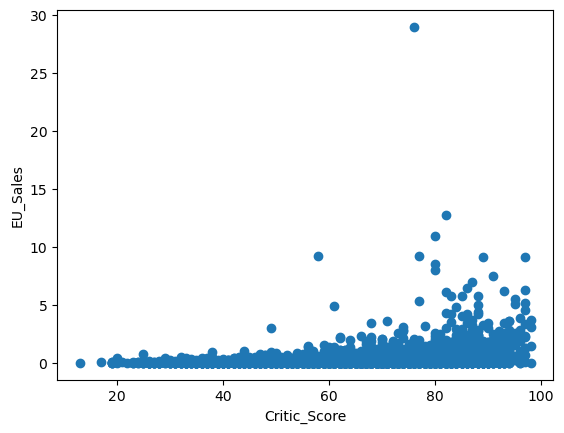

In [22]:
plt.scatter(df['Critic_Score'], df['EU_Sales'])
plt.xlabel('Critic_Score')
plt.ylabel('EU_Sales')
plt.show()

In [14]:
mode_user = df['User_Score'].mode()[0]
print("Ответ №8:", mode_user)

Ответ №8: tbd


In [33]:
median = df['Critic_Score'].median()
print("Ответ №9:", median)

Ответ №9: 71.0


In [18]:
q1 = df['User_Count'].quantile(0.25)
q3 = df['User_Count'].quantile(0.75)
iqr = q3 - q1
outliers_count = ((df['User_Count'] < (q1 - 1.5 * iqr)) | (df['User_Count'] > (q3 + 1.5 * iqr))).sum()
print("Ответ №10:", outliers_count)

Ответ №10: 1080


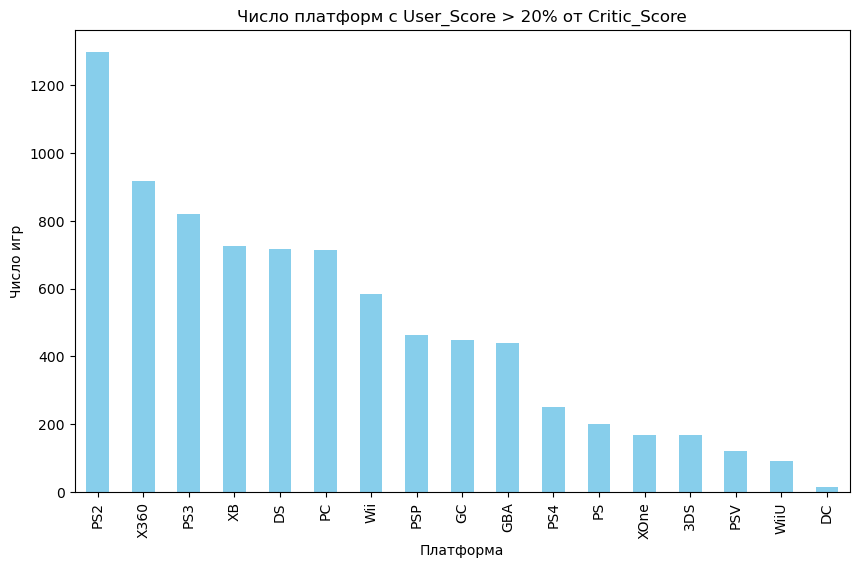

In [34]:
# Преобразование столбцов User_Score и Critic_Score в числовой формат
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')
df['Critic_Score'] = pd.to_numeric(df['Critic_Score'], errors='coerce')

# Фильтрация данных: выбираем только те строки, где User_Score больше на 20% чем Critic_Score
filtered_df = df[df['User_Score'] > 1.2 * df['Critic_Score']]
dfnew = df.dropna(subset=['Critic_Score'])
# Проверка, что фильтрация привела к непустому набору данных
if not dfnew.empty:
    # Подсчет суммарного числа платформ
    platform_counts = dfnew['Platform'].value_counts()

    # Построение столбчатой диаграммы
    platform_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
    plt.title('Число платформ с User_Score > 20% от Critic_Score')
    plt.xlabel('Платформа')
    plt.ylabel('Число игр')
    plt.show()
else:
    print("Нет данных, удовлетворяющих условиям фильтрации.")

In [35]:
Popular_2000 = df[df['Year_of_Release'] == 2000]['Publisher'].mode()[0]
print("Ответ №12:", Popular_2000)

Ответ №12: Sony Computer Entertainment


In [37]:
# Преобразование столбцов User_Score и Critic_Score в числовой формат
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')
df['Critic_Score'] = pd.to_numeric(df['Critic_Score'], errors='coerce')

# Создание столбца с различием между оценкой критиков и пользователями
df['Score_Difference'] = df['Critic_Score'] - df['User_Score']

# Нахождение трех игр с наибольшим различием
top_3_difference_games = df.nlargest(3, 'Score_Difference')[['Name', 'Critic_Score', 'User_Score', 'Score_Difference']]

print("Три игры с наибольшим различием между оценкой критиков и пользователями:")
print(top_3_difference_games)

Три игры с наибольшим различием между оценкой критиков и пользователями:
                          Name  Critic_Score  User_Score  Score_Difference
1877                   NFL 2K1          97.0         6.0              91.0
57         Grand Theft Auto IV          98.0         7.5              90.5
227   Tony Hawk's Pro Skater 2          98.0         7.7              90.3
